# Introduction

## Data structure
Information about the cells are saved in a Dictionary.
 The dictionary structure is as follows:
 {'position_1': {'cell_id_0': {'timepoint_1': {'state': 0,
    'cordinates': (236, 799)}}


position_1 - position of the cell 
state - 0 - alive, 1 - dead, 2 - division, 3 - other
coordinates - coordinates of the cell in the img
    


In [1]:
import numpy as np
from PIL import Image
import pandas as pd
import os
import imageio
from PIL import Image, ImageDraw
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
centroids_col = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/centroids_col_001.csv', header=None)
centoids_row = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/centroids_row_001.csv', header=None)
deaths = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/deaths_001.csv', header=None)
divisions = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/divisions_001.csv', header=None)

divisions.replace(1, 2, inplace=True)

In [3]:
"{:03d}".format(10)

'010'

In [4]:
def change_data_after_event(lst, event):
    found_event = False
    for i in range(len(lst)):
        if lst[i] == event:
            found_event = True
        elif found_event:
            lst[i] = 3
    return lst

for row in range(len(deaths)):
    deaths.iloc[row] = change_data_after_event(deaths.iloc[row], 1)
    
combined_matrix = deaths + divisions

#new labels 0 - alive, 1 - dead, 2 - division, 3 - other
combined_matrix.to_csv('/Users/karol/cmmc/cells_project/data_csv/001/combined_matrix.csv', header=None, index=None)

In [5]:
# fill dict
cell_id = [i for i in range(0, 21)]
combined_matrix['cell_id'] = cell_id

dict_of_cells = {}
# iterate over positions
for i in range (0, 309):
    dict_of_cells['position_' + str(i+1)] = {}
    
# iterate over cells
for i in range(0, 21):
    dict_of_cells['position_1']['cell_id_' + str(i)] = {}


for i in range(0, 21):
    for timepoint in range(len(divisions.columns)):
        dict_of_cells['position_1']['cell_id_' + str(i)]['timepoint_'+ str(timepoint+1)] = {}
        
        
# iterate over timepoints
for cell_id in range(0, 21):
    for timepoint in range(len(divisions.columns)):
        dict_of_cells['position_1']['cell_id_' + str(cell_id)]['timepoint_'+ str(timepoint+1)]['state'] = combined_matrix[timepoint][cell_id]
        dict_of_cells['position_1']['cell_id_' + str(cell_id)]['timepoint_'+ str(timepoint+1)]['cordinates'] = centroids_col[timepoint][cell_id], centoids_row[timepoint][cell_id]
        




In [6]:
valid_positions = [i for i in range(0, 46)]
valid_positions.extend([i for i in range(129, 260)])

In [7]:

dict_of_cells = {}
for i in valid_positions:
    position = "{:03d}".format(i+1)
    centroids_col = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/centroids_col_'+ position + '.csv', header=None)
    centoids_row = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/centroids_row_'+ position + '.csv', header=None)
    deaths = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/deaths_' + position + '.csv', header=None)
    divisions = pd.read_csv('/Users/karol/cmmc/cells_project/data_csv/divisions_'+ position + '.csv', header=None)

    divisions.replace(1, 2, inplace=True)
    number_of_cells = len(centoids_row)
    def change_data_after_event(lst, event):
        found_event = False
        for i in range(len(lst)):
            if lst[i] == event:
                found_event = True
            elif found_event:
                lst[i] = 3
        return lst

    for row in range(len(deaths)):
        deaths.iloc[row] = change_data_after_event(deaths.iloc[row], 1)
        
    combined_matrix = deaths + divisions

    #new labels 0 - alive, 1 - dead, 2 - division, 3 - other
    #combined_matrix.to_csv('/Users/karol/cmmc/cells_project/data_csv/001/combined_matrix.csv', header=None, index=None)

    # fill dict
    cell_id = [k for k in range(number_of_cells)]
    combined_matrix['cell_id'] = cell_id
    # iterate over positions
    dict_of_cells['position_' + str(i+1)] = {}
        
    # iterate over cells
    for j in range(number_of_cells):
        dict_of_cells['position_' + str(i+1)]['cell_id_' + str(j)] = {}


    for j in range(number_of_cells):
        for timepoint in range(len(divisions.columns)):
            dict_of_cells['position_' + str(i+1)]['cell_id_' + str(j)]['timepoint_'+ str(timepoint+1)] = {}
            
            
    # iterate over timepoints
    for cell_id in range(number_of_cells):
        for timepoint in range(len(divisions.columns)):
            dict_of_cells['position_' + str(i+1)]['cell_id_' + str(cell_id)]['timepoint_'+ str(timepoint+1)]['state'] = combined_matrix[timepoint][cell_id]
            dict_of_cells['position_' + str(i+1)]['cell_id_' + str(cell_id)]['timepoint_'+ str(timepoint+1)]['cordinates'] = centroids_col[timepoint][cell_id], centoids_row[timepoint][cell_id]
            




In [8]:
def load_coordinates(dict_of_cells, position, cell_id, timepoint):
    x,y = dict_of_cells['position_' + str(position)]['cell_id_' + str(cell_id)]['timepoint_'+ str(timepoint+1)]['cordinates']
    return x,y

In [20]:
def combine(cell_position, timepoint): 
    """
    This function combines 3 channels into one image
    """
    timepoint = "{:03d}".format(timepoint)
    cell_position = "{:03d}".format(cell_position)
    file_path = f'/Volumes/T7/cells/cells_grouped/{cell_position}/xy{cell_position}c1t{timepoint}.tif'
    if os.path.exists(file_path):
        channel1 = cv2.imread(file_path, -1)
        channel2 = cv2.imread(f'/Volumes/T7/cells/cells_grouped/{cell_position}/xy{cell_position}c2t{timepoint}.tif', -1)
        channel3 = cv2.imread(f'/Volumes/T7/cells/cells_grouped/{cell_position}/xy{cell_position}c3t{timepoint}.tif', -1)


        rgb_image = cv2.merge((channel1, channel2, channel3))
        #convert to utf-8

        img = rgb_image.astype(np.uint8)
        return img
    else:
        print(f'File {file_path} does not exist')

In [21]:
def draw_x(coordinates, im):
    """
    This function draws a crosshair on the image
    """
    if type(im) is np.ndarray:
        im = Image.fromarray(im)
    draw = ImageDraw.Draw(im)
    
    # Specify the coordinates of the location you want to mark
    x = coordinates[1]
    y = coordinates[0]

    # Mark the location by drawing a crosshair
    draw.line((x-10, y, x+10, y), fill=(255,0,0), width=2)
    draw.line((x, y-10, x, y+10), fill=(255,0,0), width=2)

    return im


In [22]:
def make_a_video(dict_of_cells, position):
    images = []
    cell_ids = [i for i in range(len(dict_of_cells['position_' + str(position)]))]
    for time_step in range(1, len(dict_of_cells['position_' + str(position)]['cell_id_0'])):
        im = combine(position, time_step)
        for cell_id in cell_ids:
            coordinates = load_coordinates(dict_of_cells, position, cell_id, time_step)
            im = draw_x(coordinates, im)
        images.append(im)
    #imageio.mimsave(f'movie_{position}.mp4', images)
    return images
    
    
            
            

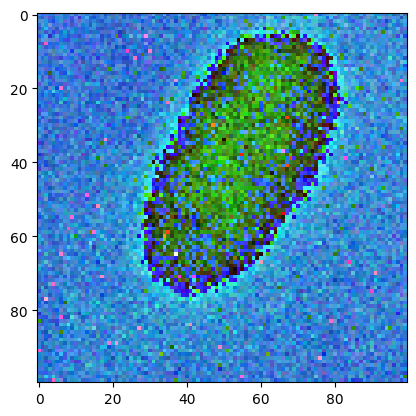

In [23]:
position = 1
cell_id = 0
timepoint = 8
coordinates = load_coordinates(dict_of_cells, position, cell_id, timepoint)
def cut_square(cell_position, timepoint, coordinates):
    # Open the image file
    img = combine(cell_position, timepoint)
    #convert to Image
    img = Image.fromarray(img)
    
    # Crop the image
    cropped_img = img.crop((coordinates[1]-50, coordinates[0]-50, coordinates[1]+50, coordinates[0]+50))

    return cropped_img

# Test the function
cut_img = cut_square(position, timepoint, coordinates)
plt.imshow(cut_img)

In [24]:
# create a dict with cropped images
def fill_dict_with_cropped_images(dict_of_cells, position):
    cell_ids = [i for i in range(len(dict_of_cells['position_' + str(position)]))]
    for time_step in range(1, len(dict_of_cells['position_' + str(position)]['cell_id_0'])):
        for cell_id in cell_ids:
            coordinates = load_coordinates(dict_of_cells, position, cell_id, time_step)
            cell_img = cut_square(position, time_step, coordinates)
            dict_of_cells['position_' + str(position)]['cell_id_' + str(cell_id)]['timepoint_'+ str(time_step+1)]['cell_img'] = cell_img
    return dict_of_cells
    

In [26]:
for i in valid_positions:   
    print(f'Processing position {i}')
    dict_of_cells = fill_dict_with_cropped_images(dict_of_cells, i+1)

Processing position 0
Processing position 1
Processing position 2
Processing position 3
Processing position 4
Processing position 5
Processing position 6
Processing position 7


KeyboardInterrupt: 